# Analyzing Special Teams Data for KPI's
### By: Tyran Johnson

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing file

file_path = 'C:/Users/Owner/Notebook projects/FOOTBALL/tracking2020.csv'
nfl_data = pd.read_csv(file_path)

In [5]:
# Filtering for only special teams plays
special_teams_events = ['kickoff', 'punt', 'field_goal']
special_teams_data = nfl_data[nfl_data['event'].isin(special_teams_events)]

In [6]:
special_teams_data.shape

(10414, 19)

### Top 10 Fastest Recorded Players on Special Teams

In [30]:
# Max speeds reached by each player in special teams plays
max_speeds = special_teams_data.groupby(['player_id', 'name'])['s'].max().reset_index()

In [31]:
# Sorting the data to find the top speeds
max_speeds_sorted = max_speeds.sort_values(by='s', ascending=False).head(10)

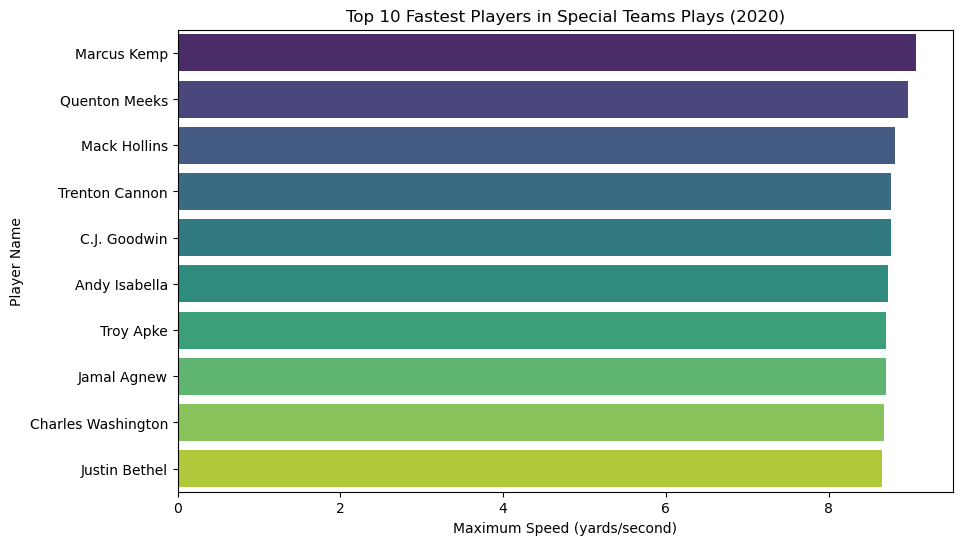

In [13]:
# Creating a bar plot for the top 10 fastest times downfield
plt.figure(figsize=(10, 6))
sns.barplot(x='s', y='name', data=max_speeds_sorted, palette="viridis")
plt.xlabel('Maximum Speed (yards/second)')
plt.ylabel('Player Name')
plt.title('Top 10 Fastest Players in Special Teams Plays (2020)')
plt.show()

### Discovering the Average Distance Traveled by Player Position

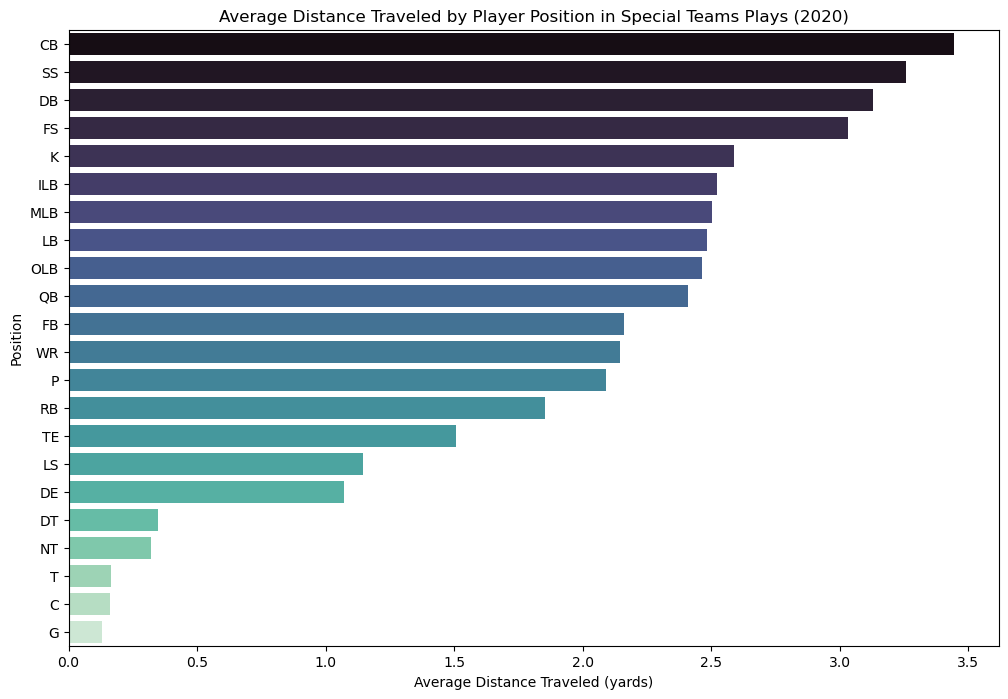

In [15]:
# Grouping the data by player and calculating the total distance traveled during special teams plays
total_distance_per_player = special_teams_data.groupby(['player_id', 'name', 'position'])['dis'].sum().reset_index()

# Average distance traveled for each position
average_distance_per_position = total_distance_per_player.groupby('position')['dis'].mean().reset_index()

# Sorting the results for better visualization
average_distance_per_position_sorted = average_distance_per_position.sort_values(by='dis', ascending=False)

# Creating a bar plot for the average distance traveled by position
plt.figure(figsize=(12, 8))
sns.barplot(x='dis', y='position', data=average_distance_per_position_sorted, palette="mako")
plt.xlabel('Average Distance Traveled (yards)')
plt.ylabel('Position')
plt.title('Average Distance Traveled by Player Position in Special Teams Plays (2020)')
plt.show()

### Discovering the Average Direction Players by Postion Travel during Special Team Plays

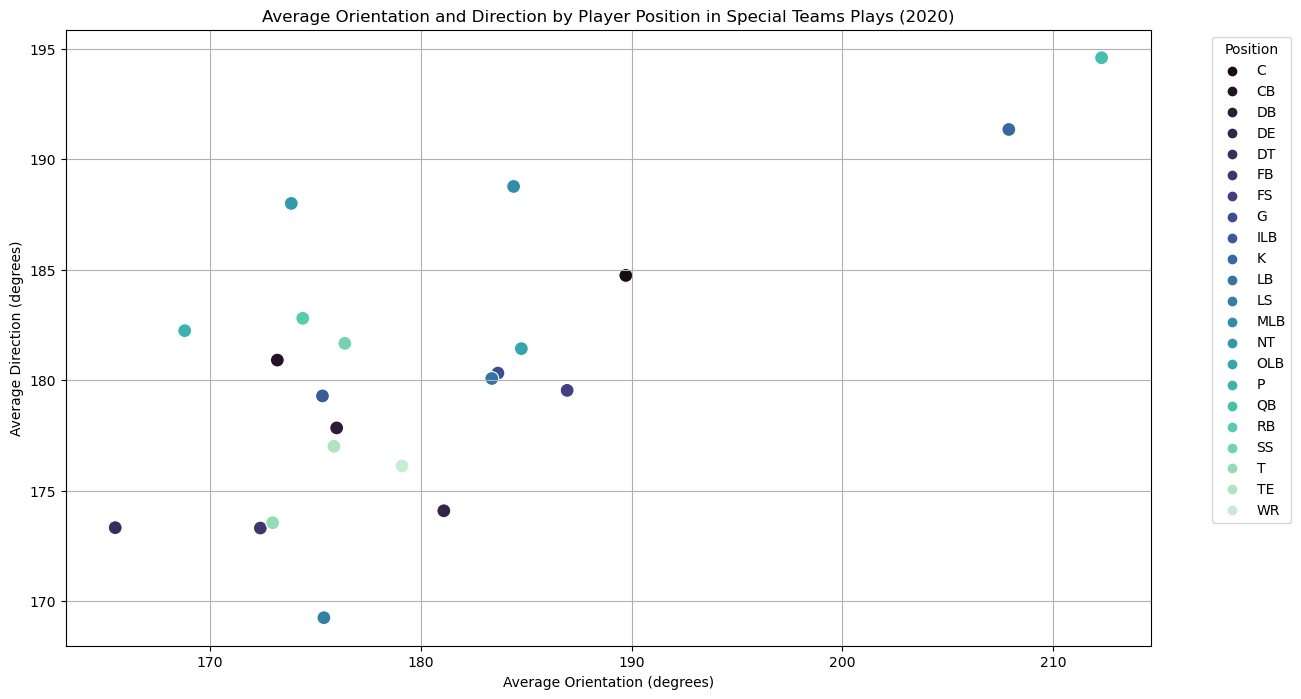

In [17]:
# Average orientation (o) and direction (dir) for each position
avg_orientation_direction = special_teams_data.groupby('position').agg(
    avg_orientation=('o', 'mean'),
    avg_direction=('dir', 'mean')
).reset_index()

# Visualizing the average orientation and direction
plt.figure(figsize=(14, 8))

# Scatter plot for average orientation and direction
sns.scatterplot(data=avg_orientation_direction, x='avg_orientation', y='avg_direction', hue='position', palette="mako", s=100)
plt.xlabel('Average Orientation (degrees)')
plt.ylabel('Average Direction (degrees)')
plt.title('Average Orientation and Direction by Player Position in Special Teams Plays (2020)')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Average Speeds By Postion on Special Team Plays

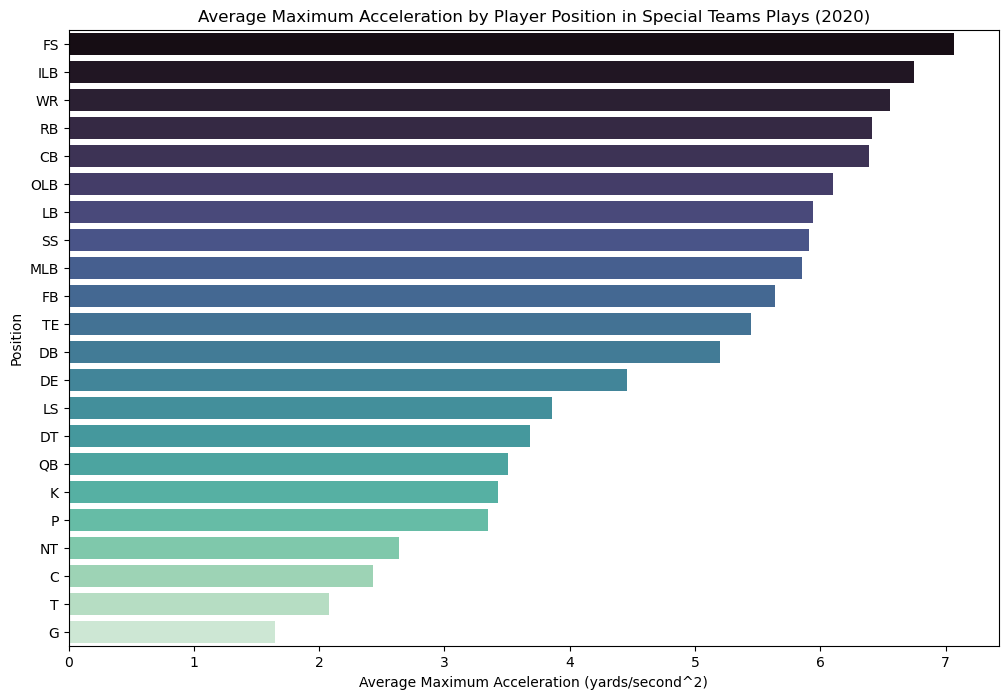

In [18]:
# Average maximum acceleration for each position
avg_max_acceleration = special_teams_data.groupby(['position'])['a'].max().reset_index()

# Sorting the results for better visualization
avg_max_acceleration_sorted = avg_max_acceleration.sort_values(by='a', ascending=False)

# Bar plot for the average maximum acceleration by position
plt.figure(figsize=(12, 8))
sns.barplot(x='a', y='position', data=avg_max_acceleration_sorted, palette="mako")
plt.xlabel('Average Maximum Acceleration (yards/second^2)')
plt.ylabel('Position')
plt.title('Average Maximum Acceleration by Player Position in Special Teams Plays (2020)')
plt.show()

### Discovering what direction and speed most plays occur

In [ ]:
# Average speed and total distance for each play direction
play_direction_analysis = special_teams_data.groupby('play_dir').agg(
    avg_speed=('s', 'mean'),
    total_distance=('dis', 'sum')
).reset_index()

# Dual-axis bar and line plot for the comparison
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for average speed
sns.barplot(x='play_dir', y='avg_speed', data=play_direction_analysis, ax=ax1, color='lightblue', alpha=0.6)
ax1.set_ylabel('Average Speed (yards/second)')
ax1.set_xlabel('Play Direction')
ax1.set_title('Average Speed and Total Distance by Play Direction in Special Teams (2020)')